In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import pandas as pd
import numpy as np

In [6]:
# Specify the folder path where the CSV files are located
path1 = "/content/drive/MyDrive/3014 Project/CSVs/Batch1"
# Create an empty list to store the DataFrames
dataframes1 = []
# Iterate through all files in the folder
for file_name in os.listdir(path1):
    if file_name.endswith(".csv"):
        # Read each CSV file into a DataFrame
        file_path1 = os.path.join(path1, file_name)
        df1= pd.read_csv(file_path1,low_memory=False)
        dataframes1.append(df1)
# Concatenate all DataFrames into a single DataFrame
combine1 = pd.concat(dataframes1, ignore_index=True)
print(combine1.shape)

(197132, 75)


In [7]:
# Specify the folder path where the CSV files are located
path2 = "/content/drive/MyDrive/3014 Project/CSVs/Batch2"
# Create an empty list to store the DataFrames
dataframes2 = []
# Iterate through all files in the folder
for file_name in os.listdir(path2):
    if file_name.endswith(".csv"):
        # Read each CSV file into a DataFrame
        file_path2 = os.path.join(path2, file_name)
        df2= pd.read_csv(file_path2,low_memory=False)
        dataframes2.append(df2)
# Concatenate all DataFrames into a single DataFrame
combine2 = pd.concat(dataframes2, ignore_index=True)
print(combine2.shape)

(370995, 83)


In [8]:
# Concatenate all combined dataframes into a single final combined DataFrame
FinalDFList=[]
FinalDFList.append(combine1)
FinalDFList.append(combine2)
FinalCombo = pd.concat(FinalDFList, ignore_index=True)
FinalCombo = FinalCombo.sort_values(by='bathrooms', na_position='last', ascending=False)
print(FinalCombo.shape)
#print(FinalCombo[['host_location']].head(50))

(568127, 83)


In [9]:
#Making CSV from the final dataset
subset_df = FinalCombo.head(10000)
print(subset_df.shape)

(10000, 83)


In [10]:
subset_df.to_csv("/content/drive/MyDrive/3014 Project/CSVs/FinalAirBnbDataset.csv",index=False)
cols = [
    'id',
    'host_id',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'price',
    'number_of_reviews',
    'host_listings_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

data = pd.read_csv('/content/drive/MyDrive/3014 Project/CSVs/FinalAirBnbDataset.csv', usecols=cols)


In [11]:
data.head()

,id,host_id,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews
0,155548.0,748161,1.0,Entire rental unit,Entire home/apt,3,t,1.0,1.0,$200.00,3,0,21
1,50602388.0,60332116,1.0,Entire rental unit,Entire home/apt,4,t,1.0,1.0,$170.00,3,1,2
2,50608863.0,3854958,1.0,Entire rental unit,Entire home/apt,4,t,2.0,2.0,$354.00,5,0,14
3,50605312.0,44442865,1.0,Entire condo,Entire home/apt,3,t,2.0,1.0,$240.00,3,0,4
4,50335507.0,405777047,1.0,Entire rental unit,Entire home/apt,4,t,2.0,2.0,$317.00,3,0,8


In [12]:
# determine the number of missing entries in each column
for col in data.columns:
    print(col + ', Number of Missing Values:', len(data[col][data[col].isnull()]))

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_listings_count, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 1332
bedrooms, Number of Missing Values: 2011
beds, Number of Missing Values: 93
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0


In [13]:
'''## Fill NaN values in dataframe using mode of every column

# Calculate the mode for all columns except 'column3'
mode_values = data.drop(columns=['review_scores_rating']).mode().iloc[0]
columns_to_fill = data.columns.difference(['review_scores_rating'])
data[columns_to_fill] = data[columns_to_fill].fillna(mode_values)
print(data)'''
mode_values = data.mode().iloc[0]
columns_to_fill = data.columns
data[columns_to_fill] = data[columns_to_fill].fillna(mode_values)

In [14]:
for col in data.columns:
    print(col + ', Number of Missing Values:', len(data[col][data[col].isnull()]))

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_listings_count, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 0
bedrooms, Number of Missing Values: 0
beds, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0


In [15]:
# convert formatting for price if needed
print(data.dtypes)
print(data[['price']].head(10))
if data['price'].dtypes!=np.float64:
  data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))

id                     float64
host_id                  int64
host_listings_count    float64
property_type           object
room_type               object
accommodates             int64
bathrooms               object
bedrooms               float64
beds                   float64
price                   object
minimum_nights           int64
availability_30          int64
number_of_reviews        int64
dtype: object
     price
0  $200.00
1  $170.00
2  $354.00
3  $240.00
4  $317.00
5  $174.00
6  $850.00
7  $201.00
8  $170.00
9  $350.00


<ipython-input-15-8661280fa2a8>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))


In [16]:
# drop any inconsistent values
print('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print('Number of Beds 0:', len(data[data['beds'] == 0]))
print('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

print("\nAfter dropping inconsistent values")
print('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print('Number of Beds 0:', len(data[data['beds'] == 0]))
print('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))


Number of Accommodates 0: 0
Number of Bedrooms 0: 0
Number of Beds 0: 0
Number of Listings with Price $0.00: 1

After dropping inconsistent values
Number of Accommodates 0: 0
Number of Bedrooms 0: 0
Number of Beds 0: 0
Number of Listings with Price $0.00: 0


In [17]:
data.head()

,id,host_id,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews
0,155548.0,748161,1.0,Entire rental unit,Entire home/apt,3,t,1.0,1.0,200.0,3,0,21
1,50602388.0,60332116,1.0,Entire rental unit,Entire home/apt,4,t,1.0,1.0,170.0,3,1,2
2,50608863.0,3854958,1.0,Entire rental unit,Entire home/apt,4,t,2.0,2.0,354.0,5,0,14
3,50605312.0,44442865,1.0,Entire condo,Entire home/apt,3,t,2.0,1.0,240.0,3,0,4
4,50335507.0,405777047,1.0,Entire rental unit,Entire home/apt,4,t,2.0,2.0,317.0,3,0,8


In [18]:
# explore distribution of accommodates
value_counts = data['accommodates'].value_counts()

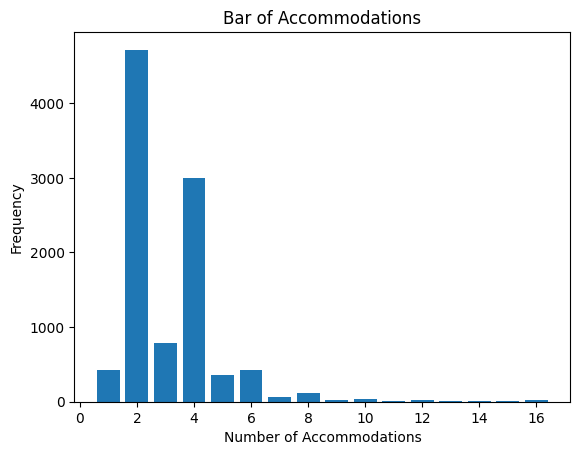

In [19]:
# visualize distribution of accommodates
import matplotlib.pyplot as plt
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Number of Accommodations')
plt.ylabel('Frequency')
plt.title('Bar of Accommodations')
plt.show()


**As we can see that most of the accomodates are of 1-4 people so now we will go for bed plotting**



In [20]:
# explore distribution of beds
value_counts1 = data['beds'].value_counts()

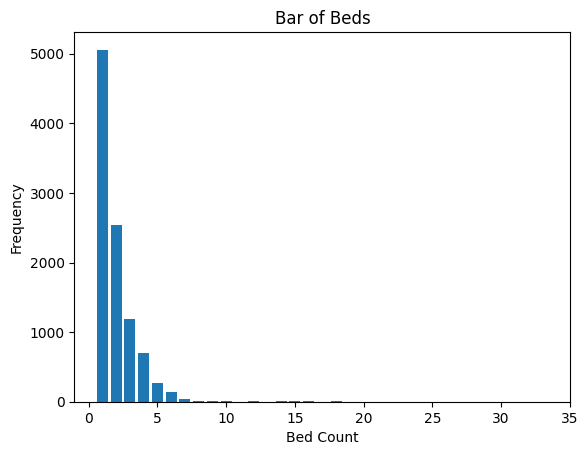

In [21]:
# visualize distribution of beds
import matplotlib.pyplot as plt
plt.bar(value_counts1.index, value_counts1.values)
plt.xlabel('Bed Count')
plt.ylabel('Frequency')
plt.title('Bar of Beds')
plt.show()

**Here we can see that mostly single bed rooms are getting purchased**

In [22]:
#getting numerical and categorical column names in different lists
column_names = data.columns
numerical_columns = []
categorical_columns = []
for column in column_names:
    if np.issubdtype(data[column].dtype, np.number):  # Check if column is numerical
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)
print("\nNumerical columns:", numerical_columns)
print("\nCategorical columns:", categorical_columns)


Numerical columns: ['id', 'host_id', 'host_listings_count', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_30', 'number_of_reviews']

Categorical columns: ['property_type', 'room_type', 'bathrooms']


In [23]:
#OH Encoding
import pandas as pd
df_encoded = pd.get_dummies(data, columns=categorical_columns, prefix='encoded')
print(df_encoded)

              id    host_id  host_listings_count  accommodates  bedrooms  \
0       155548.0     748161                  1.0             3       1.0   
1     50602388.0   60332116                  1.0             4       1.0   
2     50608863.0    3854958                  1.0             4       2.0   
3     50605312.0   44442865                  1.0             3       2.0   
4     50335507.0  405777047                  1.0             4       2.0   
...          ...        ...                  ...           ...       ...   
9995   3675469.0   17688638                  2.0             2       1.0   
9996   3756811.0     582060                 36.0             4       2.0   
9997   4004925.0   20765287                  2.0             5       2.0   
9998   3757269.0     582060                 36.0             5       3.0   
9999   4009675.0   20790978                 19.0            10       3.0   

      beds  price  minimum_nights  availability_30  number_of_reviews  ...  \
0      1.

In [29]:
#Handling the Outliers using IQR
# Calculate the IQR for each column
Q1 = df_encoded.quantile(0.25)
Q3 = df_encoded.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Identify rows with outliers
outliers = (df_encoded < (Q1 - threshold * IQR)) | (df_encoded > (Q3 + threshold * IQR))

# Remove rows with outliers
df_encoded = df_encoded[~outliers.any(axis=1)]

In [32]:
#seperating Features and target variables
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
X = df_encoded.loc[:, df_encoded.columns != 'price']
Y = df_encoded['price']
#splitting in train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
# Print the shapes of the train and test sets
print("\nTrain data shape:", X_train.shape, y_train.shape)
print("\nTest data shape:", X_test.shape, y_test.shape)


Train data shape: (1936, 76) (1936,)

Test data shape: (216, 76) (216,)


In [33]:
# Initialize and fit the preprocessing scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import ElasticNet
# Initialize and train the model on the scaled training data
print("\nElasticNET")
En_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
En_model.fit(X_train_scaled, y_train)
y_train_pred =En_model.predict(X_train_scaled)
y_test_pred =En_model.predict(X_test_scaled)
# Calculate Mean Squared Error (MSE) for train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("\nTrain MSE:", train_mse)
print("\nTest MSE:", test_mse)
# Calculate R-squared for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTrain R-squared:", train_r2)
print("\nTest R-squared:", test_r2)


ElasticNET

Train MSE: 6698.074761438011

Test MSE: 6646.800715425755

Train R-squared: 0.2580014032601726

Test R-squared: 0.2699864096131501


In [24]:
'''# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()'''

'# visualize distribution of review scores ratings\nplt.hist(data[\'review_scores_rating\'][~data[\'review_scores_rating\'].isnull()])\nplt.title("Histogram of Review Scores Ratings")\nplt.xlabel("Review Score")\nplt.ylabel("Frequency")\nplt.show()'

**Here we can see that the most of the ratings are 4-5 and it is left skewed but we will handle it don't worry at all!**

In [25]:
'''data['review_scores_rating'] = data['review_scores_rating'].astype(str)
print(data[['review_scores_rating']].dtypes)'''

"data['review_scores_rating'] = data['review_scores_rating'].astype(str)\nprint(data[['review_scores_rating']].dtypes)"

In [26]:
'''# turn NaN scores with 0 reviews into 'No Reviews'
# Convert the 'column_name' to boolean type
data['review_scores_rating'] = data['review_scores_rating'].map(lambda x: 't' if x == 'True' else (False if x == 'False' else None))
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, ('review_scores_rating')] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]'''

"# turn NaN scores with 0 reviews into 'No Reviews'\n# Convert the 'column_name' to boolean type\ndata['review_scores_rating'] = data['review_scores_rating'].map(lambda x: 't' if x == 'True' else (False if x == 'False' else None))\nidx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()\ndata.loc[idx_vals, ('review_scores_rating')] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace('NaN', 'No Reviews')\n\n# remove inconsistent NaN values\ndata = data[~data['review_scores_rating'].isnull()]"

In [27]:
'''# convert review_scores_rating into buckets
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 4 and val <=5:
        return '4-5'
    elif val >= 3 and val <4:
        return '3-3.9'
    elif val >= 2 and val < 3:
        return '2-2.9'
    elif val >= 1 and val < 2:
        return '1-1.9'
    elif val < 1:
        return '0-0.9'

data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print(data[['review_scores_rating']])
print('Unique Values in the Column:', np.unique(data['review_scores_rating']))'''

"# convert review_scores_rating into buckets\ndef convert_scores_buckets(val):\n    if val == 'No Reviews':\n        return 'No Reviews'\n    elif val >= 4 and val <=5:\n        return '4-5'\n    elif val >= 3 and val <4:\n        return '3-3.9'\n    elif val >= 2 and val < 3:\n        return '2-2.9'\n    elif val >= 1 and val < 2:\n        return '1-1.9'\n    elif val < 1:\n        return '0-0.9'\n\ndata['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)\nprint(data[['review_scores_rating']])\nprint('Unique Values in the Column:', np.unique(data['review_scores_rating']))"

In [28]:
%%shell
jupyter nbconvert --to html ///content/AirBnbFinalDemo.ipynb

[NbConvertApp] WARNING | pattern '///content/AirBnbFinalDemo.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True

CalledProcessError: ignored